In [46]:
import pandas as pd


In [47]:
data = pd.read_csv("loan_data.csv")

In [48]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
data.shape

(614, 13)

In [50]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [52]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [53]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [54]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [55]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [56]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data['Married'] = data['Married'].map({'No':0, 'Yes':1})
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
data['Education'] = data['Education'].map({'Graduate':1, 'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].map({'No':0, 'Yes':1})
data['Property_Area'] = data['Property_Area'].map({'Rural':0, 'Semiurban':1, 'Urban':2})
data['Loan_Status'] = data['Loan_Status'].map({'N':0, 'Y':1})

In [57]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [58]:
data['Dependents'] = (data['Dependents'] - data['Dependents'].min())/(data['Dependents'].max() - data['Dependents'].min())

In [59]:
for i in data.columns[1:]:
  data[i] = (data[i]-data[i].min()) / (data[i].max() - data[i].min())


In [60]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [61]:
data.to_csv('loan_prediction_data.csv', index=False)

#Steps to build a Neural Network using Keras

1. Loading the data set
2. creating training and validataion set
3. Defining the architecture of the model
4. compiling the model(defining loss function, optimizer
5. Training the model
6. Evaluating model performance on training and validation set

In [62]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
data = pd.read_csv("loan_prediction_data.csv")

In [64]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [65]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [66]:
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [67]:
#since loan_id doesn't perforn any action on load process, so it's better to drop

data = data.drop('Loan_ID', axis=1)

In [68]:
data.shape

(614, 12)

In [69]:
#separate the independent and dependent variable

X = data.drop('Loan_Status', axis=1)

y = data['Loan_Status']

In [70]:
X.shape , y.shape

((614, 11), (614,))

#Creating training and validation set

1. stratify will make sure that distribution of classes in train and validataion set is similar
2. 

In [89]:
X_train, X_test,y_train, y_test = train_test_split(X,y,stratify=data['Loan_Status'], random_state=10, test_size=0.2)

In [90]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((491, 11), (491,), (123, 11), (123,))

#Defining the architecture of model

In [91]:
import keras
print(keras.__version__)

2.4.3


In [92]:
import tensorflow as tf


In [93]:
 # importing the sequential

 from keras.models import Sequential

In [94]:
#importing different layers from keras

from keras.layers import InputLayer, Dense

In [95]:
#no of input neurons

X_train.shape

(491, 11)

In [96]:
#Features in the data set
X_train.shape[1]

11

In [97]:
# defining input neurons

input_neurons = X_train.shape[1]

In [98]:
# defining output neurons
# since loan prediction is binary classification problem , we will have single neuron in the output layer

output_neurons = 1


In [99]:
# defined no of hidden layer and hidden neurons
#it is hyperparameter and we can pick the hidden layers and hidden neurons on our own

number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [100]:
#activation function of different layers
# picked relu as an activation function for hidden layers
# since it is a binary classification problem, we use sigmoid activation function in the final layer

model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [102]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [103]:
# adding the bias for each neuron of first hidden layer
input_neurons * neuron_hidden_layer_1 +10

120

# Compiling the model(defining loss function , optimizer

In [104]:
# loss as binary_crossentropy , since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Training the model

In [105]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 1s 17ms/step - loss: 0.8979 - accuracy: 0.3190 - val_loss: 0.8325 - val_accuracy: 0.3171
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8165 - accuracy: 0.3306 - val_loss: 0.7635 - val_accuracy: 0.3496
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7497 - accuracy: 0.3574 - val_loss: 0.7194 - val_accuracy: 0.4146
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7035 - accuracy: 0.4860 - val_loss: 0.6927 - val_accuracy: 0.4959
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5472 - val_loss: 0.6771 - val_accuracy: 0.6667
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.6857 - val_loss: 0.6719 - val_accuracy: 0.7398
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.7651 - val_loss: 0.6679 - val_accuracy: 0.7642
Epoch 8/50
16/16 [=

#Evaluation model performance on validation set

In [106]:
prediction = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [107]:
accuracy_score(y_test,prediction)

0.8130081300813008

#Visualization


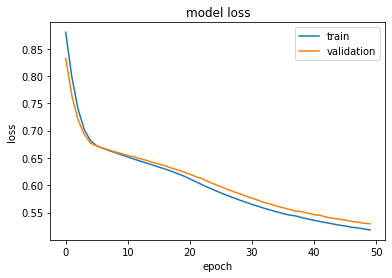

In [109]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show()

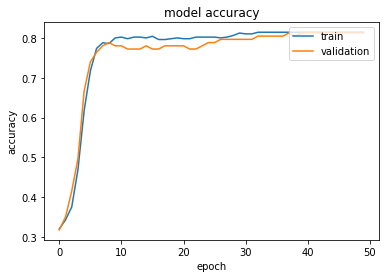

In [112]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show()